In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Download data

In [ ]:
%pip install gdown 
!gdown --id 1z1TxHd97juldLRPz55SXu4InMwbQhdNL
!gdown --id 1MmyHNbYAi6Y4fwS3f7pJDjMy8S9QWvCQ
!ls -al

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z1TxHd97juldLRPz55SXu4InMwbQhdNL
To: /content/metabolites.csv
100% 1.79M/1.79M [00:00<00:00, 135MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MmyHNbYAi6Y4fwS3f7pJDjMy8S9QWvCQ
To: /content/Data_Cortex_Nuclear.csv
100% 1.01M/1.01M [00:00<00:00, 139MB/s]
total 2752
drwxr-xr-x 1 root root    4096 Dec  7 19:04 .
drwxr-xr-x 1 root root    4096 Dec  7 12:51 ..
drwxr-xr-x 4 root root    4096 Dec  5 14:36 .conf

## Metabolomic dataset

The dataset contains information on levels of metabilites in stool samples collected from patients with Colorectal cancer (CRC) and healthy control group.

### Metadata
* **`Group`** - `Healthy` control group / Various stages of CRC / `HS` - heatlhy with a history of colorectal surgery / `MP` - Multiple polypoid adenomas
* **`Stage`** - Stage of disease
* **`Age`**
* **`Gender`**
* **`Brinkman Index`** - Smoking history index
* **`Alcohol`** - alcohol consumption (grams per day)
* **`Tumor location`**

### Metabolites
Levels of 450 metabolites

### Data Source
Dataset is based on *Yachida S, Mizutani S, Shiroma H, et al. Metagenomic and metabolomic analyses reveal distinct stage-specific phenotypes of the gut microbiota in colorectal cancer. Nat Med. 2019;25(6):968-976. doi:10.1038/s41591-019-0458-7*

In [ ]:
metabolites = pd.read_csv('metabolites.csv', index_col=0)
metabolites.head()

,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location,C00024_Acetyl CoA,C01996_Acetylcholine,...,C00440_5-Methyltetrahydrofolate,C00170_5-Methylthioadenosine,C01879_5-Oxoproline,C02378_6-Aminohexanoate,C06103_6-Hydroxyhexanoate,C01020_6-Hydroxynicotinate,C08434_6-Methylaminopurine,"C02953_7,8-Dihydrobiopterin","C04874_7,8-Dihydroneopterin",C02242_7-Methylguanine
Sample ID,,,,,,,,,,,,,,,,,,,,,
10023,Healthy,-,65,M,26.562500,660.0,0.0,-,0.000000,1.036026,...,3.000730,3.196043,4.321721,0.000000,0.0,0.0,0.0,1.290214,0.00000,4.452146
10025,Healthy,-,40,M,25.000000,400.0,993.0,-,4.501771,0.457927,...,2.772158,3.229917,5.143740,0.000000,0.0,0.0,0.0,2.751319,0.00000,4.411868
10029,Healthy,-,67,F,20.173253,0.0,0.0,-,0.000000,-0.128546,...,0.000000,2.346616,5.392691,2.511281,0.0,0.0,0.0,0.000000,2.82316,4.442370
10031,Healthy,-,77,M,24.464602,300.0,813.0,-,3.646184,0.259788,...,2.535716,3.120999,4.679146,0.000000,0.0,0.0,0.0,3.267578,0.00000,4.385342
10036,Healthy,-,64,F,21.155294,0.0,0.0,-,0.000000,1.296258,...,3.716767,2.271742,4.723737,0.000000,0.0,0.0,0.0,0.000000,0.00000,3.823966


In [ ]:
metabolites.shape

(406, 458)

# Exploratory Data Analysis

## Categorical variables

In [ ]:
metabolites['Group'].value_counts()

Healthy         149
Stage_I_II       80
Stage_III_IV     68
MP               45
HS               34
Stage_0          30
Name: Group, dtype: int64

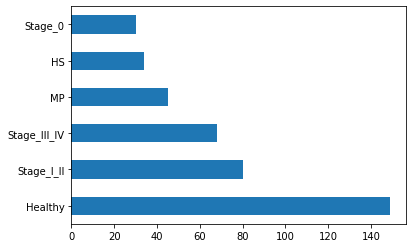

In [ ]:
metabolites['Group'].value_counts().plot(kind='barh')

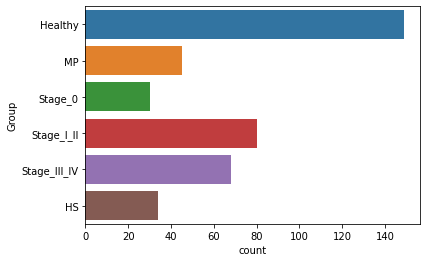

In [ ]:
sns.countplot(
    data=metabolites,
    y='Group',
)

## Continuous variables

In [ ]:
metabolites['Age'].value_counts().head()

69    22
70    20
73    20
64    19
66    18
Name: Age, dtype: int64

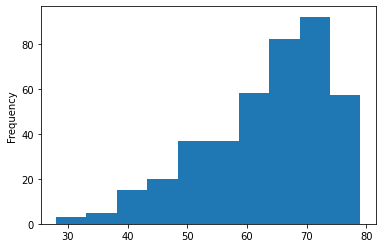

In [ ]:
metabolites['Age'].plot(kind='hist')

Text(0.5, 1.0, 'Age')

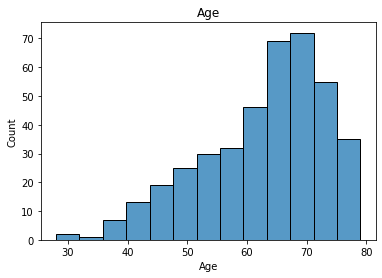

In [ ]:
ax = sns.histplot(
    data=metabolites,
    x='Age',
)

ax.set_title('Age')

## $\color{purple}{\text{Exercise 1}}$

1. Create a FOR loop that plots `countplots` for all discrete variables (`Group`, `Stage`, `Gender`, `Tumor location`). Set a title for every plot.
2. Create a FOR loop that plots histograms for some of continuous variables (e.g. `Age`, `BMI`, `Brinkman Index`, `Alcohol`, `C00008_ADP`). Set a title for every plot.

*hint: use plt.show() at the end of each iteration to actually plot to notebook*

[5 min]

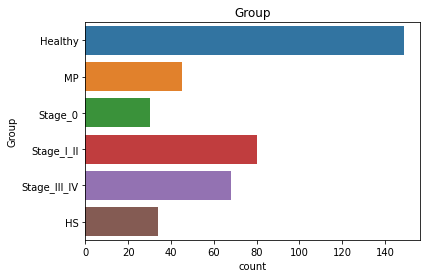

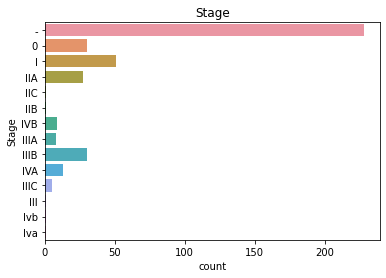

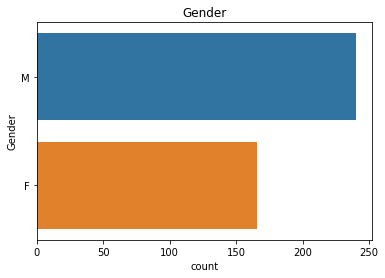

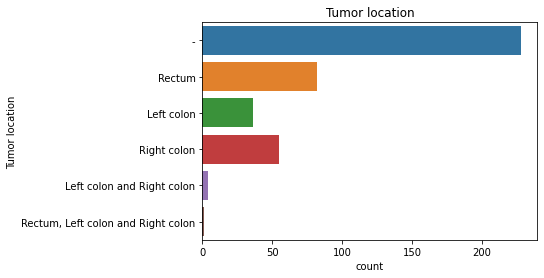

In [ ]:
# Your code goes here:
for var in ['Group', 'Stage', 'Gender', 'Tumor location']:
    ax = sns.countplot(
        data=metabolites,
        y=var
    )
    ax.set_title(var)
    plt.show()


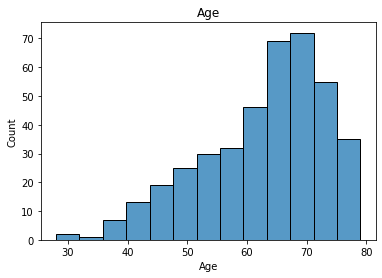

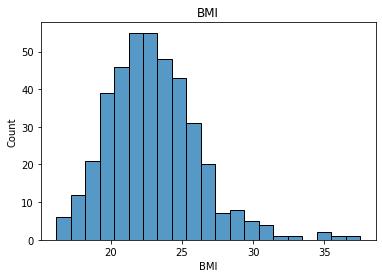

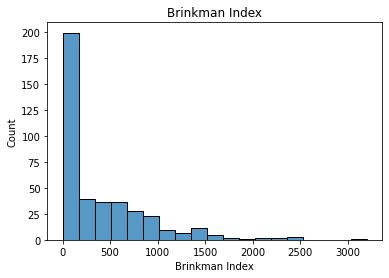

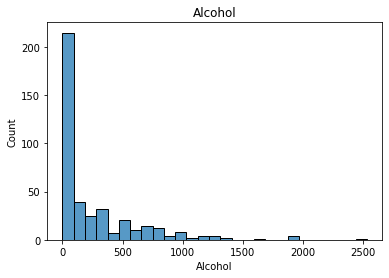

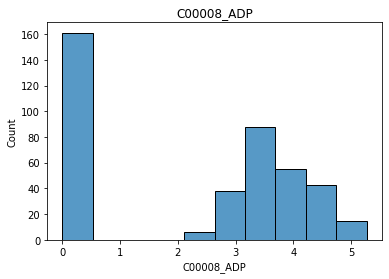

In [ ]:
# Your code goes here:
for var in ['Age', 'BMI', 'Brinkman Index', 'Alcohol', 'C00008_ADP']:
    ax = sns.histplot(
        data=metabolites,
        x=var
    )
    ax.set_title(var)
    plt.show()


## Relations between variables

### **Discrete** - **Discrete** pairs

In [ ]:
metabolites.groupby('Gender')['Tumor location'].value_counts().unstack(0)

Gender,F,M
Tumor location,,
-,91.0,137.0
Left colon,16.0,20.0
Left colon and Right colon,1.0,3.0
Rectum,30.0,52.0
"Rectum, Left colon and Right colon",NaN,1.0
Right colon,28.0,27.0


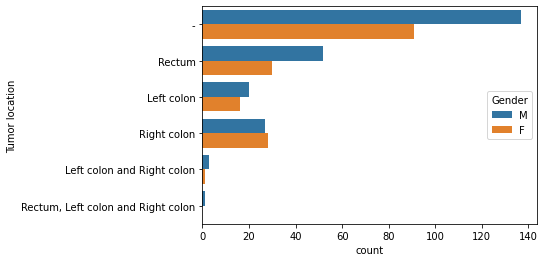

In [ ]:
sns.countplot(
    data=metabolites,
    y='Tumor location',
    hue='Gender'
)

### **Discrete** - *Continuous* pairs

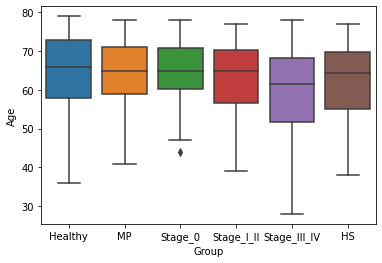

In [ ]:
sns.boxplot(
    data=metabolites,
    y='Age',
    x='Group'
)

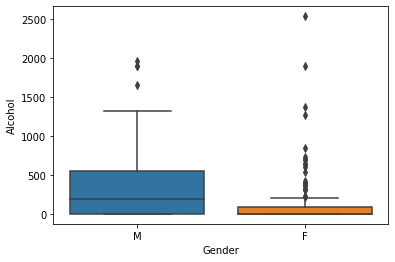

In [ ]:
sns.boxplot(
    data=metabolites,
    y='Alcohol',
    x='Gender'
)

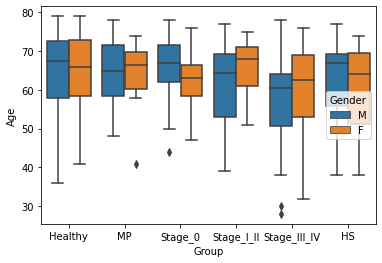

In [ ]:
sns.boxplot(
    data=metabolites,
    y='Age',
    x='Group',
    hue='Gender'
)

### *Continuous* - *Continuous* pairs

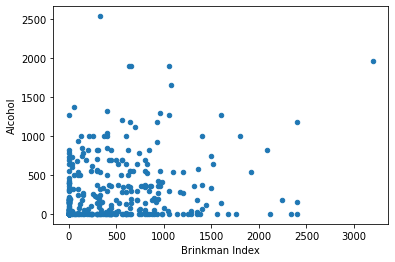

In [ ]:
metabolites.plot(kind='scatter', x='Brinkman Index', y='Alcohol')

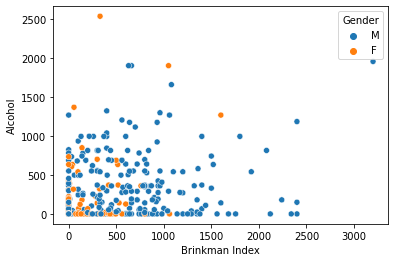

In [ ]:
sns.scatterplot(
    data=metabolites, 
    x='Brinkman Index', 
    y='Alcohol', 
    hue='Gender'
)

## $\color{purple}{\text{Exercise 2}}$

Plot following:

1. Countplot of `Tumor location` grouped by `Group` 
2. Boxplot with `BMI` grouped by `Gender`
3. Scatterplot `BMI` vs. `Age` grouped by `Gender`
4. Scatterplot of `C00581_Guanidinoacetate` and `3-Indoxyl sulfate` colored by `Gender`. Try using `sns.jointplot` instead of `sns.scatterplot` to add variable marginal distributions* 

Can we say more about the data with these plots?

[5 min]

In [ ]:
# Your code goes here

# Multivariate Analysis with **Machine Learning**

**The real problem:** how to find interesting relations between all metabolies & an outcome variable (e.g. Healthy vs. Disease)


**Use case:** Find metabolites that differentiate people with late-stage CRC (3 or 4 stage) from the healthy control group. Those metabolites can lead to novel biomarkers or therapeutics.


## Prepare input data

Filter out samples that are not from `Healthy` nor `Stage_III_IV` groups.

In [ ]:
is_in_34_or_healthy = metabolites['Group'].isin(['Healthy', 'Stage_III_IV'])
is_in_34_or_healthy

Sample ID
10023     True
10025     True
10029     True
10031     True
10036     True
         ...  
10313    False
10329    False
10368    False
10374    False
10444    False
Name: Group, Length: 406, dtype: bool

Standard ML notation:
  
*X - features* <br>
*y - target*

In [ ]:
X = metabolites[is_in_34_or_healthy].iloc[:, 8:]
X.head()

,C00024_Acetyl CoA,C01996_Acetylcholine,C00147_Adenine,C00212_Adenosine,"C00054_Adenosine 3',5'-diphosphate",C00224_Adenosine 5'-phosphosulfate,C06104_Adipate,C03626_ADMA,C00008_ADP,C00498_ADP-glucose,...,C00440_5-Methyltetrahydrofolate,C00170_5-Methylthioadenosine,C01879_5-Oxoproline,C02378_6-Aminohexanoate,C06103_6-Hydroxyhexanoate,C01020_6-Hydroxynicotinate,C08434_6-Methylaminopurine,"C02953_7,8-Dihydrobiopterin","C04874_7,8-Dihydroneopterin",C02242_7-Methylguanine
Sample ID,,,,,,,,,,,,,,,,,,,,,
10023,0.000000,1.036026,2.601960,3.945036,0.0,0.0,5.316991,3.634511,0.000000,0.0,...,3.000730,3.196043,4.321721,0.000000,0.0,0.0,0.0,1.290214,0.00000,4.452146
10025,4.501771,0.457927,2.572170,4.330759,0.0,0.0,5.368703,3.733458,3.698429,0.0,...,2.772158,3.229917,5.143740,0.000000,0.0,0.0,0.0,2.751319,0.00000,4.411868
10029,0.000000,-0.128546,3.327181,3.752937,0.0,0.0,6.251517,2.217650,0.000000,0.0,...,0.000000,2.346616,5.392691,2.511281,0.0,0.0,0.0,0.000000,2.82316,4.442370
10031,3.646184,0.259788,2.872246,3.592089,0.0,0.0,5.543576,3.865045,3.457408,0.0,...,2.535716,3.120999,4.679146,0.000000,0.0,0.0,0.0,3.267578,0.00000,4.385342
10036,0.000000,1.296258,2.849623,3.015126,0.0,0.0,0.000000,2.369720,0.000000,0.0,...,3.716767,2.271742,4.723737,0.000000,0.0,0.0,0.0,0.000000,0.00000,3.823966


In [ ]:
y = metabolites[is_in_34_or_healthy]['Group']
y.head()

Sample ID
10023    Healthy
10025    Healthy
10029    Healthy
10031    Healthy
10036    Healthy
Name: Group, dtype: object

In [ ]:
y.value_counts()

Healthy         149
Stage_III_IV     68
Name: Group, dtype: int64

## Single train-test split

Split X & y to train-test subsets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train

,C00024_Acetyl CoA,C01996_Acetylcholine,C00147_Adenine,C00212_Adenosine,"C00054_Adenosine 3',5'-diphosphate",C00224_Adenosine 5'-phosphosulfate,C06104_Adipate,C03626_ADMA,C00008_ADP,C00498_ADP-glucose,...,C00440_5-Methyltetrahydrofolate,C00170_5-Methylthioadenosine,C01879_5-Oxoproline,C02378_6-Aminohexanoate,C06103_6-Hydroxyhexanoate,C01020_6-Hydroxynicotinate,C08434_6-Methylaminopurine,"C02953_7,8-Dihydrobiopterin","C04874_7,8-Dihydroneopterin",C02242_7-Methylguanine
Sample ID,,,,,,,,,,,,,,,,,,,,,
10621,4.674099,-0.461788,1.859031,2.513915,0.0,0.0,6.516163,3.571042,5.107516,0.0,...,0.000000,2.282783,0.000000,0.000000,0.000000,3.893171,0.0,0.00000,0.0,3.410994
10258,3.031209,0.364080,2.269127,3.830884,0.0,0.0,5.595668,2.837045,0.000000,0.0,...,4.017237,2.716681,4.145312,0.000000,0.000000,0.000000,0.0,0.00000,0.0,3.722200
10169,2.422207,0.000000,2.967346,4.569485,0.0,0.0,5.954050,2.182675,2.330699,0.0,...,0.000000,2.367165,4.758534,0.000000,4.511856,0.000000,0.0,0.00000,0.0,3.233851
10317,4.788659,0.000000,3.334319,4.119040,0.0,0.0,7.392015,3.208555,4.323332,0.0,...,3.016561,2.786176,4.290061,0.000000,0.000000,0.000000,0.0,0.00000,0.0,4.415230
10229,0.000000,0.639034,0.489832,5.622337,0.0,0.0,0.000000,3.102022,0.000000,0.0,...,2.766145,2.106795,4.804569,0.000000,0.000000,0.000000,0.0,0.00000,0.0,3.202749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,0.000000,-0.437440,3.984239,4.660690,0.0,0.0,5.761723,3.716226,0.000000,0.0,...,0.000000,2.201821,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,3.803483
10776,0.000000,0.560965,3.649770,4.805639,0.0,0.0,5.047770,3.181448,0.000000,0.0,...,3.152363,2.698751,5.109256,3.740723,0.000000,0.000000,0.0,0.00000,0.0,4.283831
10357,0.000000,0.000000,2.409687,3.756360,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,1.977156,4.134333,0.000000,0.000000,0.000000,0.0,0.00000,0.0,1.929779


In [ ]:
X.shape

(217, 450)

In [ ]:
X_train.shape

(173, 450)

In [ ]:
X_test.shape

(44, 450)

### **1/ Model training** - finding the X<->y relation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# model = LogisticRegression(solver='liblinear') # We should standardize input before LogisticRegression (+ log1p)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### **2/ Model prediction** 

When model is trained, we can predict *target* variable based only on *features*.

In [ ]:
y_test_pred = model.predict(X_test)
y_test_pred

array(['Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Stage_III_IV', 'Healthy', 'Stage_III_IV', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Stage_III_IV',
       'Healthy', 'Stage_III_IV', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Stage_III_IV', 'Healthy', 'Healthy', 'Healthy',
       'Healthy'], dtype=object)

### **3/ Model Evaluation** - estimating the power of the X<->y relation

and then evaluate how accurate those predictions are.

In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test_pred, y_test)
acc_score

0.7727272727272727

**Accuracy** is not the best metric, especially for unbalanced datasets. We can use **Balanced Accuracy** or **ROC AUC** instead.

In [ ]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score

print('Balanced accuracy: ', balanced_accuracy_score(y_test, y_test_pred))
print('ROC AUC: ', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Balanced accuracy:  0.6377171215880894
ROC AUC:  0.6898263027295286


### **4/ Model Interpretation** - estimating the X<->y relation

In [ ]:
## For LogisticRegression
# importance = model.coef_.abs() 

## For RandomForestClassifier
importances = model.feature_importances_  
importances[:5]

array([0.00118951, 0.00556605, 0.00486411, 0.00809809, 0.        ])

In [ ]:
importances = pd.Series(
    index=X.columns,
    data=importances.squeeze()
)
importances.head()

C00024_Acetyl CoA                     0.001190
C01996_Acetylcholine                  0.005566
C00147_Adenine                        0.004864
C00212_Adenosine                      0.008098
C00054_Adenosine 3',5'-diphosphate    0.000000
dtype: float64

**Most important metabolites:**

In [ ]:
importances.sort_values(ascending=False).head(10)

C00864_Pantothenate               0.018175
C00386_Carnosine                  0.016913
C01026_N,N-Dimethylglycine        0.016199
C00785_Urocanate                  0.015054
C01035_gamma-Guanidinobutyrate    0.014635
C01015_Hydroxyproline             0.013493
C00099_beta-Ala                   0.013375
C03626_ADMA                       0.012975
C00049_Asp                        0.011324
C00065_Ser                        0.010631
dtype: float64

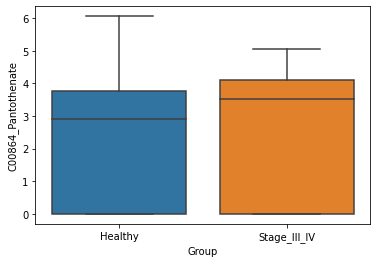

In [ ]:
sns.boxplot(
    data=metabolites[is_in_34_or_healthy],
    x='Group',
    y='C00864_Pantothenate'
)

## $\color{purple}{\text{Exercise 3}}$

Repeat the same training-testing procedure for `Healthy vs Stage_I_II` problem. Is the found relation stronger or not? Why?

[5 min]


In [ ]:
# Your code goes here

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

results = cross_validate(
    estimator=model,
    X=X,
    y=y,
    cv=10,
    scoring='accuracy',
    return_estimator=True
)

results

In [ ]:
results['test_score'].mean(), results['test_score'].std()

In [ ]:
importances = pd.DataFrame(
    data=[est.feature_importances_ for est in results['estimator']],
    columns=X.columns
)

importances.agg(['mean', 'std']).T.sort_values('mean', ascending=False).head(10)

In [ ]:
sns.boxplot(
    data=metabolites[is_in_34_or_healthy],
    x='Group',
    y='C01026_N,N-Dimethylglycine'
)

## $\color{purple}{\text{Exercise 4}}$

1. Repeat the same crossvalidation procedure for `Healthy vs Stage_I_II` problem. Is the found relation stronger or not? Why? Are there the exact most important features? Why? If there is time, you can also compare it with `Healthy vs Stage_0` case.
2. (Optionally) Same but to predict `Gender`. How can this model be useful?

[8 min]

In [ ]:
# Your code goes here

## $\color{darkorange}{\text{Homework}}$
1. Go to https://archive.ics.uci.edu/ml/index.php
2. Select one dataset (choose one with csv or tsv file - it will be easier to start).
3. Repeat similar analysis as in this notebook.